### 1. Data input

In [1]:
import numpy    as np
import pandas   as pd
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates  as mdt

data    =   pd.read_excel('HIST_PAINEL_COVIDBR_20200521.xlsx')


### 2. Time axis conversion to days

In [2]:
Brasil =  data[data['regiao'] == 'Brasil']
date   =  pd.to_datetime(Brasil['data'])
t      =  np.empty(len(date), dtype='int')
t0     =  datetime.datetime(2020, 3, 16).timestamp()

for k, d in enumerate(date):
    t[k] = int((d.timestamp() - t0)/86400)

Brasil.set_index(t, inplace=True)    

now    =  datetime.datetime(2020, 5, 21).timestamp()
tnow   = (now - t0)/86400


### 3. All Brazil modelling

#### 3.1. Logistic model

In [3]:
from scipy.optimize import curve_fit

def model(t, p1, p2, p3):#, p4):
    return p1/(1 + np.exp(-(t - p2)/p3))


#### 3.2. Accumulated number of infected people

Final maximum value: 620174 persons.  
Time offset:           66.0 days.     
Scale factor:          11.8 days.     


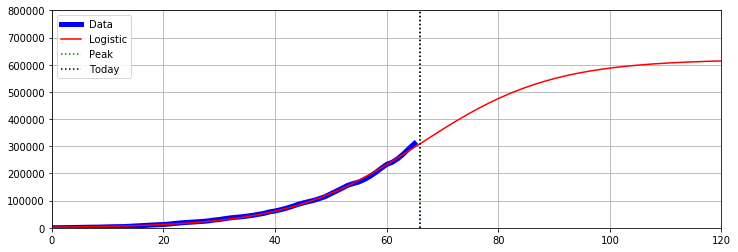

In [4]:
X    =  Brasil['casosAcumulado'].values
Xmax =  X.max()

Pmin = (    Xmax,   0,   1)     # lower bounds
P0   = (1.5*Xmax,  60,  30)     # initial guesses
Pmax = (2.0*Xmax, 180,  60)     # upper bounds

P, cv = curve_fit(model, t, X, p0=P0, bounds=(Pmin, Pmax))

tm   =  np.linspace(0, 180, 180)
Xm   =  model(tm, P[0], P[1], P[2])

plt.figure(4, figsize=(12,4))
plt.plot(t,  X,  'b', lw=5)
plt.plot(tm, Xm, 'r')  
plt.plot([P[1], P[1]], [0, 800000], 'g:')
plt.plot([tnow, tnow], [0, 800000], 'k:')
plt.grid(True)
plt.axis([0, 120, 0, 800000])
plt.legend(('Data', 'Logistic', 'Peak', 'Today'))

print('Final maximum value: {0:6.0f} persons.  '.format(P[0]))
print('Time offset:         {0:6.1f} days.     '.format(P[1]))
print('Scale factor:        {0:6.1f} days.     '.format(P[2]))


#### 3.3. Accumulated number of deceased people

Final maximum value:  35732 persons.  
Time offset:           62.9 days.     
Scale factor:          11.2 days.     


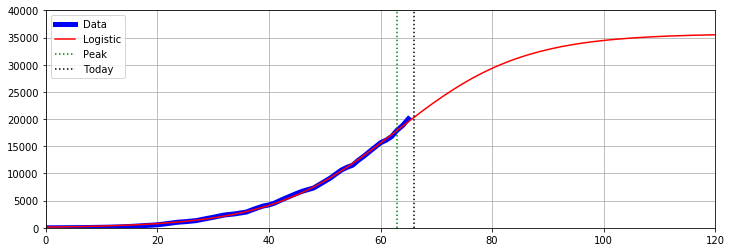

In [5]:
X    =  Brasil['obitosAcumulado'].values
Xmax =  X.max()

Pmin = (    Xmax,   0,   1)     # lower bounds
P0   = (1.5*Xmax,  60,  30)     # initial guesses
Pmax = (2.0*Xmax, 180,  60)     # upper bounds

P, cv = curve_fit(model, t, X, p0=P0, bounds=(Pmin, Pmax))

tm   =  np.linspace(0, 180, 180)
Xm   =  model(tm, P[0], P[1], P[2])

plt.figure(4, figsize=(12,4))
plt.plot(t,  X,  'b', lw=5)
plt.plot(tm, Xm, 'r')  
plt.plot([P[1], P[1]], [0, 40000], 'g:')
plt.plot([tnow, tnow], [0, 40000], 'k:')
plt.grid(True)
plt.axis([0, 120, 0, 40000])
plt.legend(('Data', 'Logistic', 'Peak', 'Today'))

print('Final maximum value: {0:6.0f} persons.  '.format(P[0]))
print('Time offset:         {0:6.1f} days.     '.format(P[1]))
print('Scale factor:        {0:6.1f} days.     '.format(P[2]))


### 4. Plots for some subset

#### 4.1. Data selection


In [6]:
RS     = data[data['estado'] == 'RS']
RS     = RS.groupby('data').sum()

date   = pd.to_datetime(RS.index)
t      =  np.empty(len(date), dtype='int')
t0     =  datetime.datetime(2020, 3, 16).timestamp()

for k, d in enumerate(date):
    t[k] = int((d.timestamp() - t0)/86400)

RS.set_index(t, inplace=True)    

now    =  datetime.datetime.now().timestamp()
tnow   = (now - t0)/86400


#### 4.2. Accumulated cases of infected people

Final maximum value:  21892 persons.  
Time offset:           69.8 days.     
Scale factor:          14.1 days.     


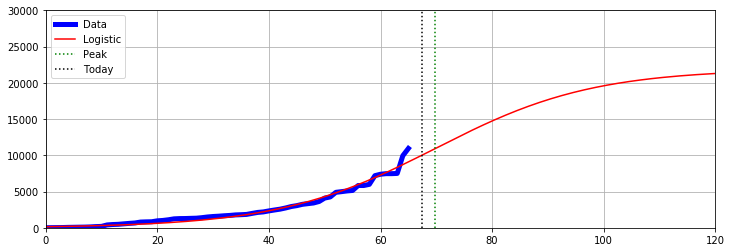

In [7]:
X    =  RS['casosAcumulado'].values
Xmax =  X.max()

Pmin = (    Xmax,   0,   1)     # lower bounds
P0   = (1.5*Xmax,  60,  30)     # initial guesses
Pmax = (2.0*Xmax, 180,  60)     # upper bounds

P, cv = curve_fit(model, t, X, p0=P0, bounds=(Pmin, Pmax))

tm   =  np.linspace(0, 180, 180)
Xm   =  model(tm, P[0], P[1], P[2])

plt.figure(4, figsize=(12,4))
plt.plot(t,  X,  'b', lw=5)
plt.plot(tm, Xm, 'r')  
plt.plot([P[1], P[1]], [0, 30000], 'g:')
plt.plot([tnow, tnow], [0, 30000], 'k:')
plt.grid(True)
plt.axis([0, 120, 0, 30000])
plt.legend(('Data', 'Logistic', 'Peak', 'Today'))

print('Final maximum value: {0:6.0f} persons.  '.format(P[0]))
print('Time offset:         {0:6.1f} days.     '.format(P[1]))
print('Scale factor:        {0:6.1f} days.     '.format(P[2]))


#### 4.3. Accumulated cases of deceased people

Final maximum value:    528 persons.  
Time offset:           59.6 days.     
Scale factor:          11.4 days.     


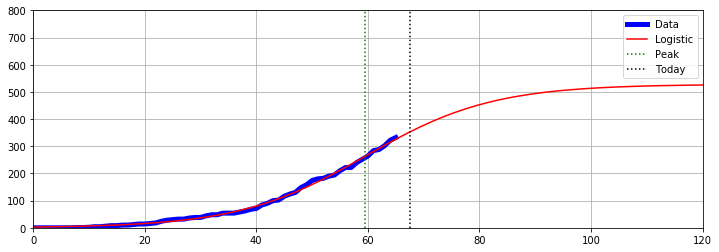

In [8]:
X    =  RS['obitosAcumulado'].values
Xmax =  X.max()

Pmin = (    Xmax,   0,   1)     # lower bounds
P0   = (1.5*Xmax,  60,  30)     # initial guesses
Pmax = (2.0*Xmax, 180,  60)     # upper bounds

P, cv = curve_fit(model, t, X, p0=P0, bounds=(Pmin, Pmax))

tm   =  np.linspace(0, 180, 180)
Xm   =  model(tm, P[0], P[1], P[2])

plt.figure(4, figsize=(12,4))
plt.plot(t,  X,  'b', lw=5)
plt.plot(tm, Xm, 'r')  
plt.plot([P[1], P[1]], [0, 800], 'g:')
plt.plot([tnow, tnow], [0, 800], 'k:')
plt.grid(True)
plt.axis([0, 120, 0, 800])
plt.legend(('Data', 'Logistic', 'Peak', 'Today'))

print('Final maximum value: {0:6.0f} persons.  '.format(P[0]))
print('Time offset:         {0:6.1f} days.     '.format(P[1]))
print('Scale factor:        {0:6.1f} days.     '.format(P[2]))
